# Intern Name - Ajoe P Johnson

# The Sparks Foundation Oct2021

# GRIP Task3: Exploratory Data Analysis - Retail 


## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset


In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Analysing the Dataset

In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Changing the datatype of postal code as it is a categorical variable 

In [5]:
df['Postal Code'] = df['Postal Code'].astype(object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


## Checking for the null values

In [7]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## Renaming the columns 

In [9]:
df = df.rename(columns={'Ship Mode':'Ship_Mode',
                            'Postal Code':'Postal_Code',
                            'Sub-Category':'Sub_Category'})

In [10]:
df.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Dropping Unnecessary column

In [11]:
df['Country'].unique()

array(['United States'], dtype=object)

In [12]:
df = df.drop(columns=['Country'] , axis=1)
df.head()

,Ship_Mode,Segment,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Dropping duplicate Rows

In [13]:
df.duplicated().sum(), df.shape

(17, (9994, 12))

In [14]:
df.drop_duplicates(keep="first",inplace=True)
df.shape

(9977, 12)

## Checking for outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

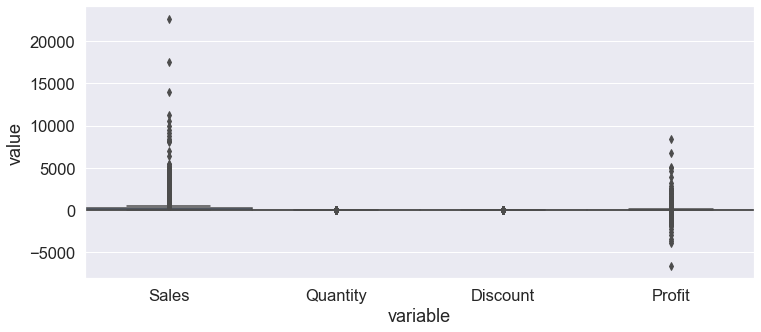

In [15]:
data_con=df.select_dtypes(include=[np.number])
plt.figure(figsize=[12,5])
sns.set(font_scale=1.5)
sns.boxplot(x='variable', y='value', data=pd.melt(data_con), width=1)

In [16]:
lower_limit=0
upper_limit=0
# performing imputing method
def data_imputing(value):
    global lower_limit
    global upper_limit
    if value<lower_limit:
        value=lower_limit
    if value>upper_limit:
        value=upper_limit
    return value

def limit(str):
    global lower_limit
    global upper_limit
    q1=df[str].quantile(0.25)
    q3=df[str].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*(iqr)
    upper_limit=q3+1.5*(iqr)
    
limit('Sales')    
df['Sales']=df['Sales'].apply(data_imputing)

limit('Quantity')
df['Quantity']=df['Quantity'].apply(data_imputing)

limit('Profit')
df['Profit']=df['Profit'].apply(data_imputing)

limit('Discount')
df['Discount']=df['Discount'].apply(data_imputing)
print("Removed Outliers Done")

Removed Outliers Done


<AxesSubplot:xlabel='variable', ylabel='value'>

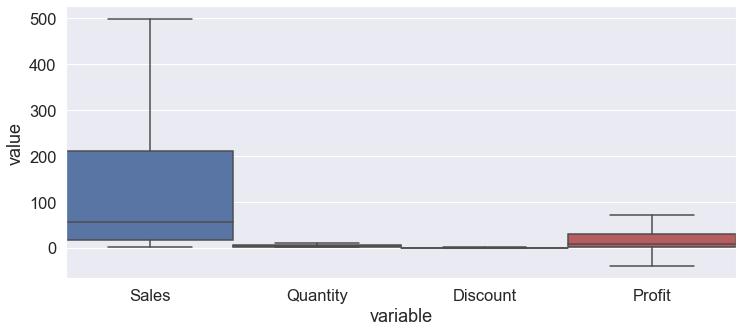

In [17]:
data_con=df.select_dtypes(include=[np.number])
plt.figure(figsize=[12,5])
sns.set(font_scale=1.5)
sns.boxplot(x='variable', y='value', data=pd.melt(data_con), width=1)

## Correlation in the dataset

In [18]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.267679,-0.014697,0.450235
Quantity,0.267679,1.000000,0.004477,0.194303
Discount,-0.014697,0.004477,1.000000,-0.515483
Profit,0.450235,0.194303,-0.515483,1.000000


<AxesSubplot:>

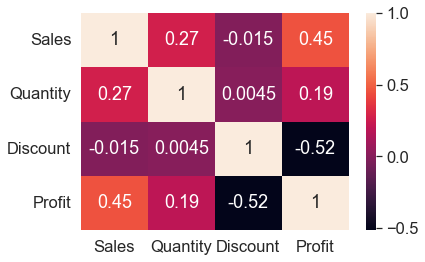

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
ship = df['Ship_Mode'].unique()
seg =df['Segment'].unique()
cat = df['Category'].unique()
reg = df['Region'].unique()

print(ship)
print(seg)
print(cat)
print(reg)


['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['South' 'West' 'Central' 'East']



## Visualisation of Ship_Mode, Segment, Category and Region Grouped with Profit by mean

<AxesSubplot:title={'center':'Region'}, ylabel='Profit'>

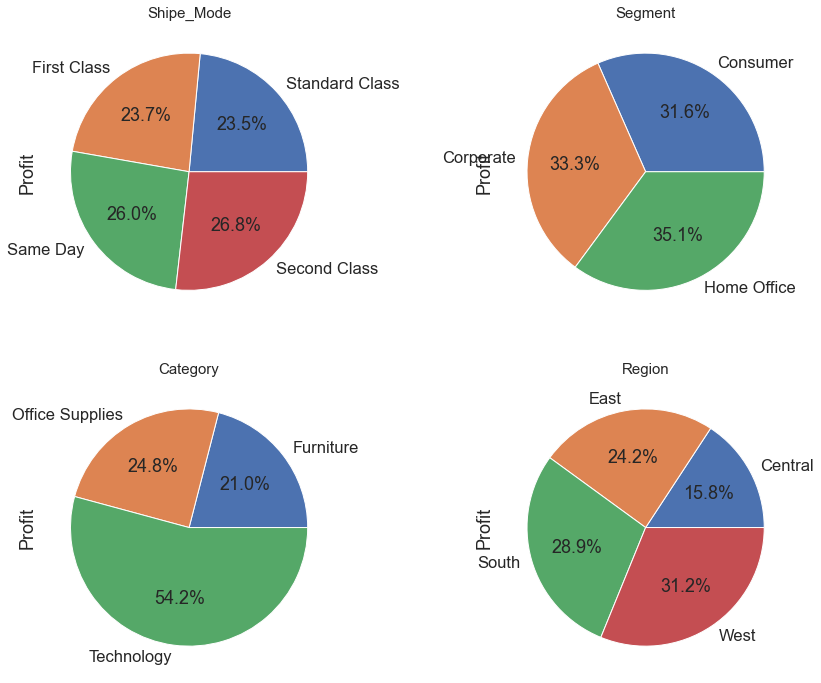

In [21]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1).set_title('Shipe_Mode',fontsize= 15)
df.groupby('Ship_Mode')['Profit'].mean().sort_values().plot.pie(autopct = '%0.1f%%')

plt.subplot(2,2,2).set_title('Segment',fontsize= 15)
df.groupby('Segment')['Profit'].mean().sort_values().plot.pie(autopct = '%0.1f%%')

plt.subplot(2,2,3).set_title('Category',fontsize= 15)
df.groupby('Category')['Profit'].mean().sort_values().plot.pie(autopct = '%0.1f%%')

plt.subplot(2,2,4).set_title('Region',fontsize= 15)
df.groupby('Region')['Profit'].mean().sort_values().plot.pie(autopct = '%0.1f%%')

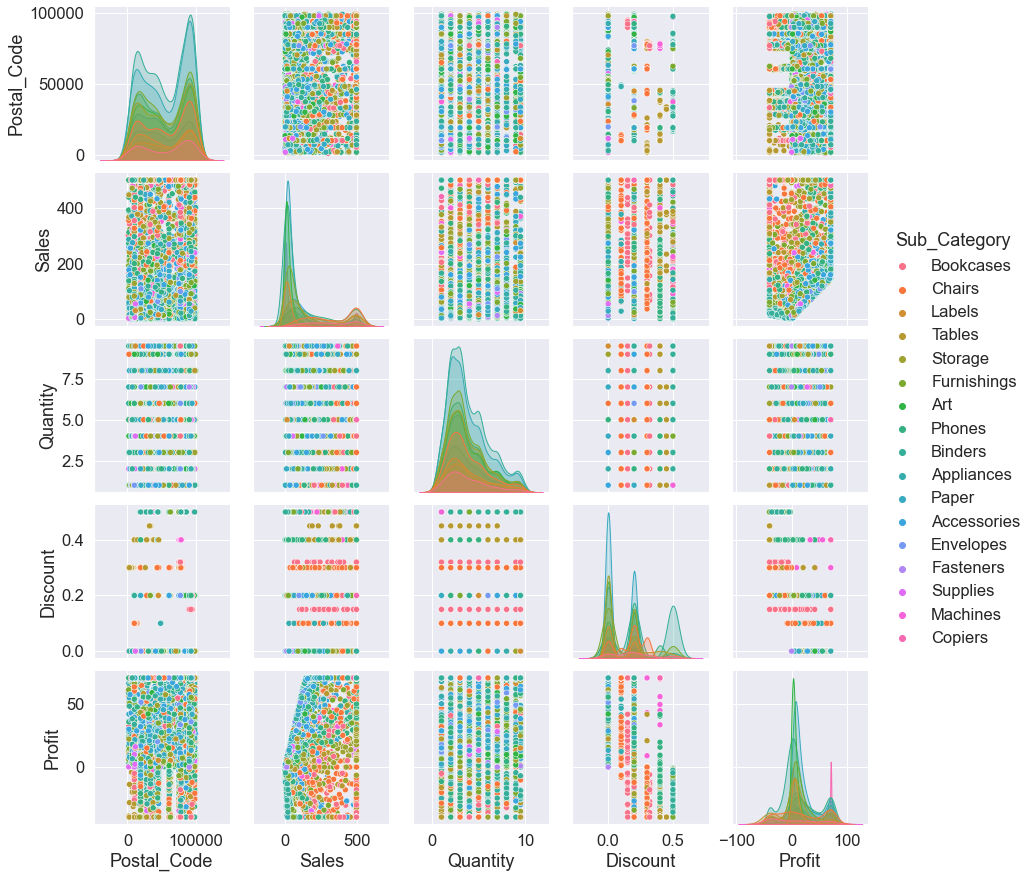

In [22]:
sns.pairplot(df,hue='Sub_Category')

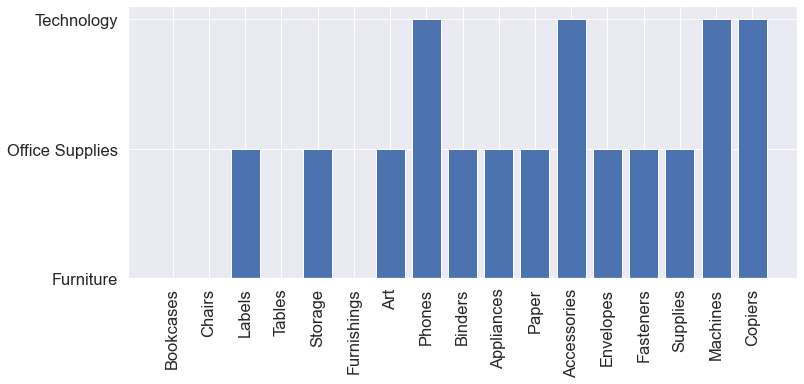

In [29]:
plt.figure(figsize=(12,5))
plt.bar('Sub_Category','Category', data=df)
plt.xticks(rotation=90)
plt.show()

## Visualisation of states Grouped with Profit by mean

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

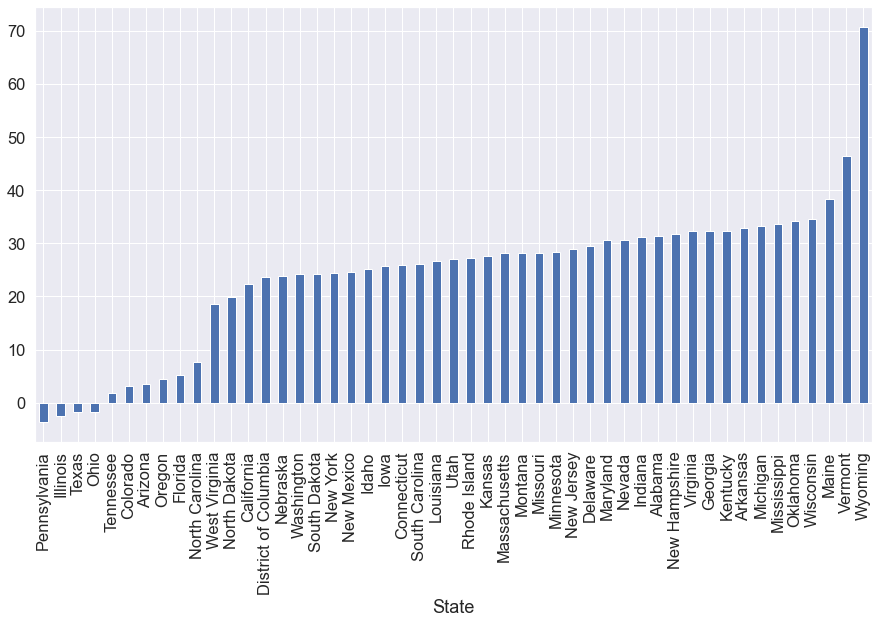

In [24]:
print(df['State'].value_counts())
plt.figure(figsize=(15,8))
df.groupby('State')['Profit'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()


## Visualisation of states Grouped with Profit by mean

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_Category, dtype: int64


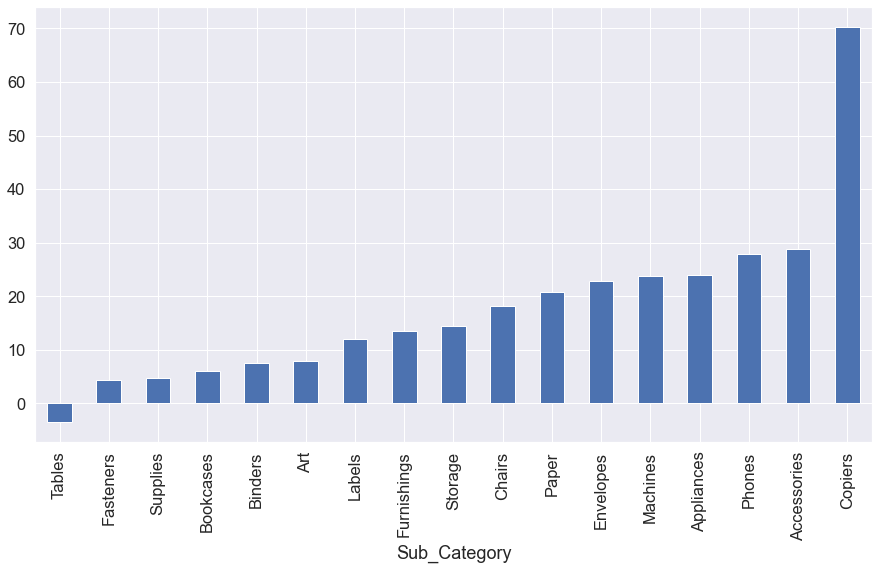

In [25]:
print(df['Sub_Category'].value_counts())
plt.figure(figsize=(15,8))
df.groupby('Sub_Category')['Profit'].mean().sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

## Analysis on Covariance

<AxesSubplot:>

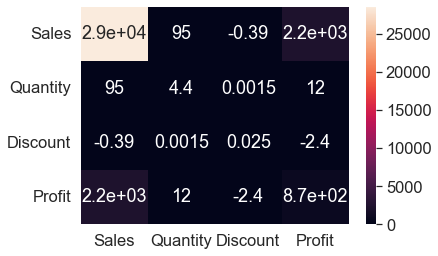

In [26]:
sns.heatmap(df.cov(), annot= True)

## Grouping Ship_Mode, Segment, Category, Sub_Category, State and Region with Quantity, Discount, Sales and Profit by mean

In [27]:
data1 = pd.DataFrame(df.groupby(['Ship_Mode','Segment','Category','Sub_Category','State','Region'])['Quantity','Discount','Sales','Profit'].sum().reset_index())
data1

,Ship_Mode,Segment,Category,Sub_Category,State,Region,Quantity,Discount,Sales,Profit
0,First Class,Consumer,Furniture,Bookcases,Arizona,West,5.0,0.50,181.470,-39.7425
1,First Class,Consumer,Furniture,Bookcases,California,West,9.0,0.45,1029.307,88.3583
2,First Class,Consumer,Furniture,Bookcases,Colorado,West,3.0,0.50,89.991,-39.7425
3,First Class,Consumer,Furniture,Bookcases,Florida,South,3.0,0.20,314.352,-15.7176
4,First Class,Consumer,Furniture,Bookcases,Georgia,South,5.0,0.00,354.900,70.8407
...,...,...,...,...,...,...,...,...,...,...
2978,Standard Class,Home Office,Technology,Phones,Texas,Central,12.0,0.60,808.704,77.9712
2979,Standard Class,Home Office,Technology,Phones,Vermont,East,5.0,0.00,498.975,70.8407
2980,Standard Class,Home Office,Technology,Phones,Virginia,South,13.5,0.00,365.130,58.7384
2981,Standard Class,Home Office,Technology,Phones,Washington,West,17.0,1.20,1397.255,67.3556


## Scatter Plot between Sales and Profit

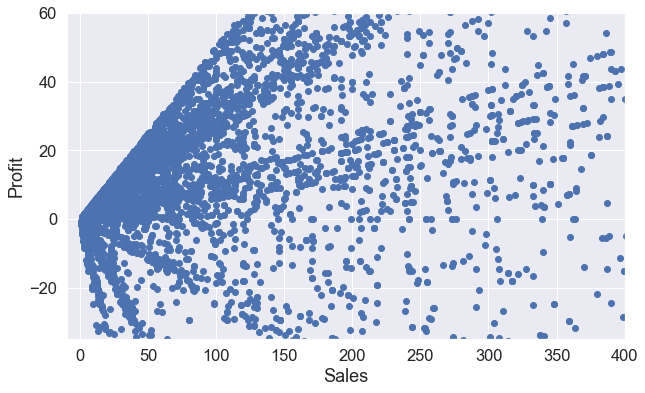

In [28]:
fig, ax = plt.subplots(figsize = (10 , 6))
ax.scatter(df["Sales"] , df["Profit"])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.ylim(-35,60)  
plt.xlim(-10,400)  
plt.show()